## Final Project
#### Authors: Jacklyn Tellez & Hunter Waldridge
#### Semester: Spring 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.datasets import make_regression
from sklearn.datasets import make_blobs

import statsmodels.api as sm

#### Importing data:

In [2]:
train = pd.read_csv('avila-tr.txt')
test = pd.read_csv('avila-ts.txt')

In [3]:
avila = pd.concat([test,train])

In [4]:
avila

,Intercolumnar_distance,Upper_margin,Lower_margin,Exploitation,Row_number,Modular_Ratio,Interlinear_spacing,Weight,Peak_number,Modular_ratio/Interlinear_spacing,Class
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A
...,...,...,...,...,...,...,...,...,...,...,...
10425,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141,F
10426,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134,F
10427,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142,A
10428,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969,E


## Exploratory Analysis

#### Checking for missing data:

In [5]:
print(np.sum(avila.isna()))

Intercolumnar_distance               0
Upper_margin                         0
Lower_margin                         0
Exploitation                         0
Row_number                           0
Modular_Ratio                        0
Interlinear_spacing                  0
Weight                               0
Peak_number                          0
Modular_ratio/Interlinear_spacing    0
Class                                0
dtype: int64


#### Data types:

In [6]:
avila.dtypes

Intercolumnar_distance               float64
Upper_margin                         float64
Lower_margin                         float64
Exploitation                         float64
Row_number                           float64
Modular_Ratio                        float64
Interlinear_spacing                  float64
Weight                               float64
Peak_number                          float64
Modular_ratio/Interlinear_spacing    float64
Class                                 object
dtype: object

#### Summary statistics:

In [7]:
avila.describe()

,Intercolumnar_distance,Upper_margin,Lower_margin,Exploitation,Row_number,Modular_Ratio,Interlinear_spacing,Weight,Peak_number,Modular_ratio/Interlinear_spacing
count,2.086700e+04,20867.000000,20867.000000,20867.000000,2.086700e+04,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000
mean,-3.306656e-09,0.018498,0.002329,0.000115,5.697992e-08,0.002540,0.003977,0.000028,0.002108,0.000069
std,1.000007e+00,2.853117,1.058203,0.999997,9.999948e-01,1.065179,1.153325,1.000003,1.045362,1.000010
min,-3.498799e+00,-2.426761,-3.210528,-5.440122,-4.922215e+00,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-1.289290e-01,-0.259834,0.064919,-0.527256,1.723400e-01,-0.598658,-0.044076,-0.543914,-0.372457,-0.515235
50%,5.622900e-02,-0.055704,0.217845,0.089437,2.617180e-01,-0.058835,0.220177,0.108279,0.064084,-0.025918
75%,2.043550e-01,0.203385,0.352988,0.643738,2.617180e-01,0.564038,0.446679,0.648814,0.500624,0.528425
max,1.181992e+01,386.000000,50.000000,3.987152,1.066121e+00,53.000000,83.000000,13.173081,44.000000,11.911338


#### *Data description says all attributes were normalized, but the upper_margin data has a standard deviation of 2.85*

#### Boxplot to visualize upper margin:

{'whiskers': [<matplotlib.lines.Line2D at 0x7feb0354de20>,
 'caps': [<matplotlib.lines.Line2D at 0x7feb0356c4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feb0354db50>],
 'medians': [<matplotlib.lines.Line2D at 0x7feb0356c9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7feb0356cc70>],
 'means': []}

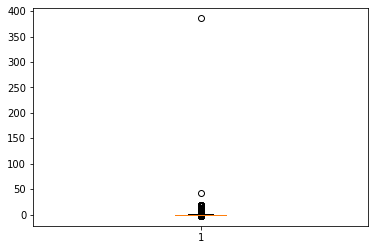

In [8]:
plt.boxplot(avila.Upper_margin)

#### *Boxplot shows there is an outlier in this column, skewing the standard deviation*

#### Getting rid of outlier to normalize data:

In [9]:
max(avila.Upper_margin)

386.0

In [10]:
avila1=avila.loc[avila["Upper_margin"] != 386]

In [11]:
max(avila1.Upper_margin)

43.133656

#### Reviewing Upper_margin boxplot after outlier deletion:

{'whiskers': [<matplotlib.lines.Line2D at 0x7feb04147ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7feb040014c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feb04147c40>],
 'medians': [<matplotlib.lines.Line2D at 0x7feb04001a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7feb04001d30>],
 'means': []}

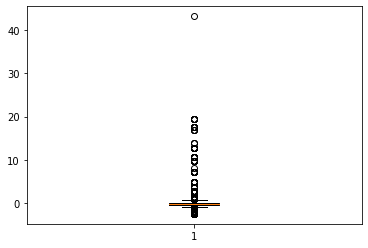

In [12]:
plt.boxplot(avila1.Upper_margin)

#### *Deleted outlier makes upper margin column's std more normal*

In [13]:
avila1.describe()

,Intercolumnar_distance,Upper_margin,Lower_margin,Exploitation,Row_number,Modular_Ratio,Interlinear_spacing,Weight,Peak_number,Modular_ratio/Interlinear_spacing
count,2.086600e+04,2.086600e+04,20866.000000,20866.000000,2.086600e+04,2.086600e+04,2.086600e+04,20866.000000,2.086600e+04,20866.000000
mean,-3.306815e-09,-3.412250e-08,-0.000067,0.000107,5.698265e-08,-1.851816e-07,-4.044858e-07,0.000015,-5.705933e-07,0.000039
std,1.000031e+00,1.000027e+00,1.000017,1.000021,1.000019e+00,1.000020e+00,1.000034e+00,1.000025,1.000026e+00,1.000024
min,-3.498799e+00,-2.426761e+00,-3.210528,-5.440122,-4.922215e+00,-7.450257e+00,-1.193546e+01,-4.247781,-5.486218e+00,-6.719324
25%,-1.289290e-01,-2.598340e-01,0.064919,-0.527256,1.723400e-01,-5.986580e-01,-4.407600e-02,-0.543919,-3.724570e-01,-0.515242
50%,5.622900e-02,-5.570400e-02,0.217845,0.089437,2.617180e-01,-5.883500e-02,2.201770e-01,0.108269,6.408400e-02,-0.025936
75%,2.043550e-01,2.033850e-01,0.352988,0.643738,2.617180e-01,5.640380e-01,4.466790e-01,0.648838,5.006240e-01,0.528362
max,1.181992e+01,4.313366e+01,7.458681,3.987152,1.066121e+00,1.231557e+01,1.071479e+01,13.173081,3.244594e+00,11.911338


#### Histogram of dataset:

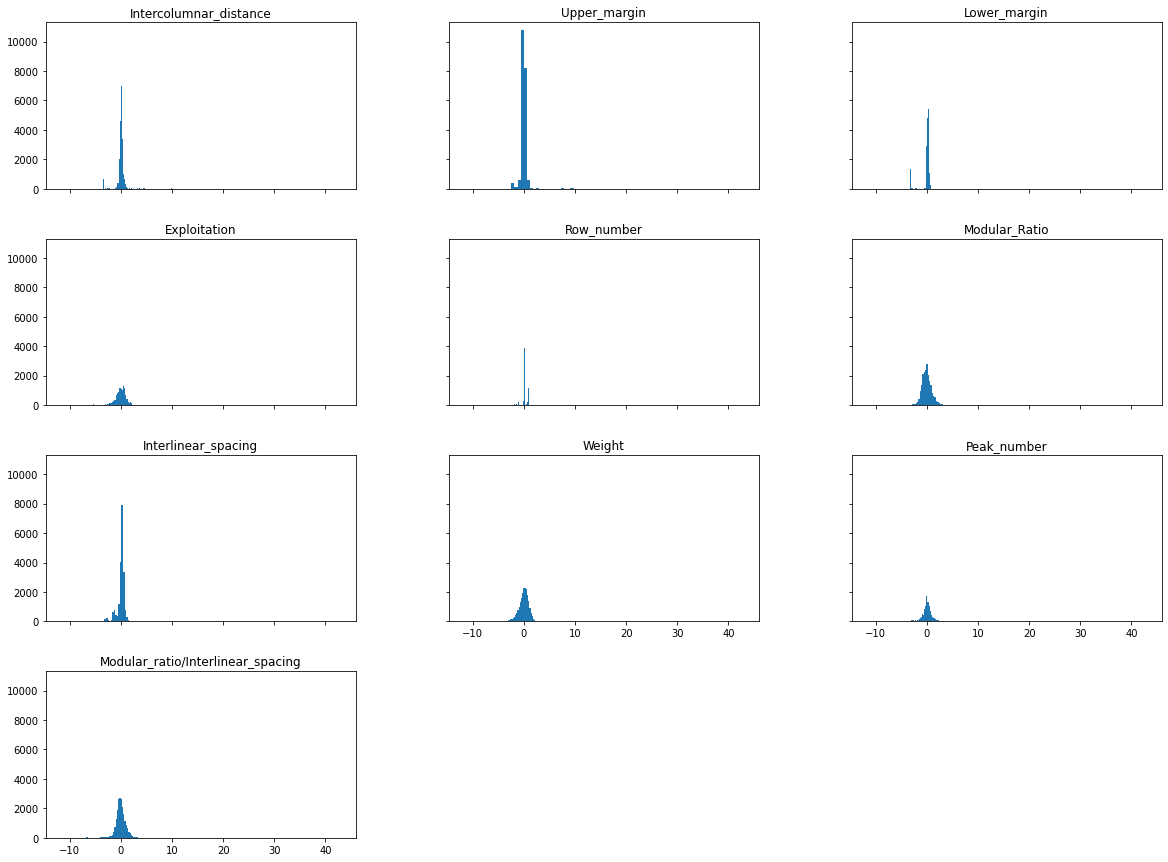

In [14]:
avila1.hist(
    bins=75,
    figsize=(20, 15),
    grid = False,
    rwidth = 2,
    sharex = True,
    sharey = True
)
plt.show()


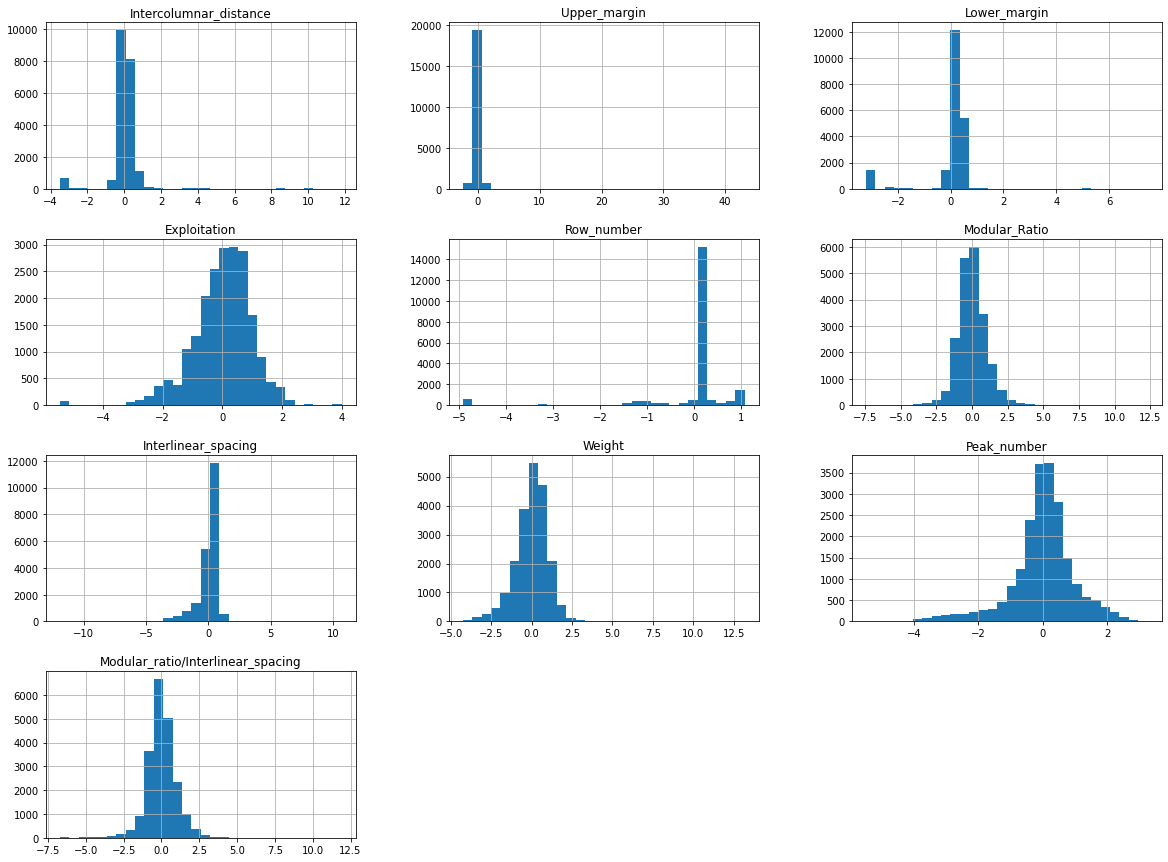

In [15]:
avila1.hist(bins = 30, figsize=(20, 15))
plt.show()

#### Correlation matrix:

In [16]:
avila1.corr()

,Intercolumnar_distance,Upper_margin,Lower_margin,Exploitation,Row_number,Modular_Ratio,Interlinear_spacing,Weight,Peak_number,Modular_ratio/Interlinear_spacing
Intercolumnar_distance,1.000000,-0.132278,0.038563,-0.057191,0.447930,-0.056887,-0.030105,-0.057518,0.085495,-0.013904
Upper_margin,-0.132278,1.000000,-0.018002,-0.001896,-0.245059,-0.079576,-0.023710,0.110565,-0.124938,-0.103062
Lower_margin,0.038563,-0.018002,1.000000,0.152158,0.012562,-0.088394,0.027517,0.034188,0.027402,-0.062259
Exploitation,-0.057191,-0.001896,0.152158,1.000000,0.096447,0.283741,0.049888,0.358601,0.307654,0.327625
Row_number,0.447930,-0.245059,0.012562,0.096447,1.000000,0.044415,0.022873,-0.065375,0.298997,0.144195
Modular_Ratio,-0.056887,-0.079576,-0.088394,0.283741,0.044415,1.000000,0.274999,-0.047357,0.053768,0.857448
Interlinear_spacing,-0.030105,-0.023710,0.027517,0.049888,0.022873,0.274999,1.000000,0.017155,0.037916,0.314547
Weight,-0.057518,0.110565,0.034188,0.358601,-0.065375,-0.047357,0.017155,1.000000,0.542691,0.001304
Peak_number,0.085495,-0.124938,0.027402,0.307654,0.298997,0.053768,0.037916,0.542691,1.000000,0.200208
Modular_ratio/Interlinear_spacing,-0.013904,-0.103062,-0.062259,0.327625,0.144195,0.857448,0.314547,0.001304,0.200208,1.000000


#### Heatmap of correlation matrix:

<AxesSubplot:>

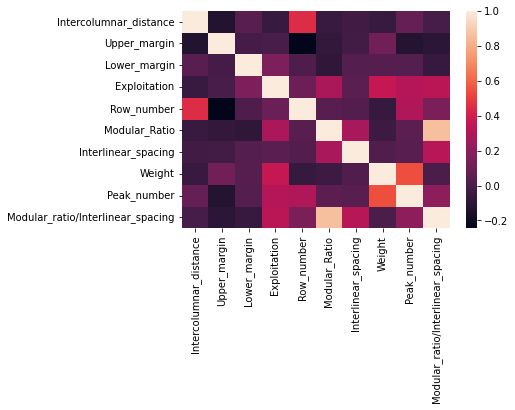

In [17]:
sns.heatmap(avila1.corr())

#### Better visualization of correlation matrix:

/var/folders/43/bdr7jz1d737fv912dn77d7400000gn/T/ipykernel_30486/148263293.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.logical_not(np.tril(np.ones_like(corr, dtype=np.bool)))


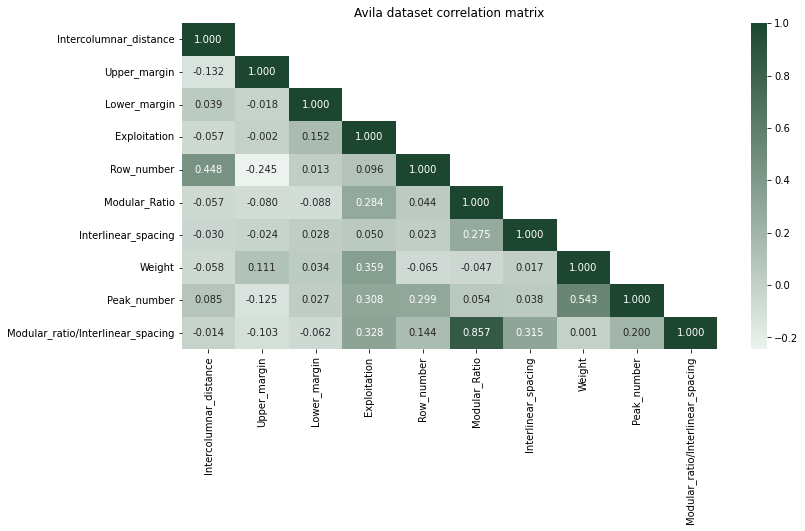

In [18]:
corr = avila1.corr()
hm_fig, hm_ax = plt.subplots(figsize=(12,6))
mask = np.logical_not(np.tril(np.ones_like(corr, dtype=np.bool)))
sns.heatmap(
    corr,
    annot=True,
    mask=mask,
    fmt='.3f',
    ax=hm_ax,
    cmap=sns.light_palette('#1c462f', n_colors=300),
)
hm_ax.set_xticklabels(hm_ax.get_xticklabels(), rotation=90)
hm_ax.set_title('Avila dataset correlation matrix')
hm_ax.patch.set_alpha(0);

#### Counts of each class value:

In [19]:
counts = avila1['Class'].value_counts()

In [20]:
counts

A    8571
F    3923
E    2190
I    1663
X    1044
H    1039
G     893
D     705
Y     533
C     206
W      89
B      10
Name: Class, dtype: int64

#### Bar graph of counts:

<AxesSubplot:title={'center':'Number of Each Class'}, xlabel='Class', ylabel='Count'>

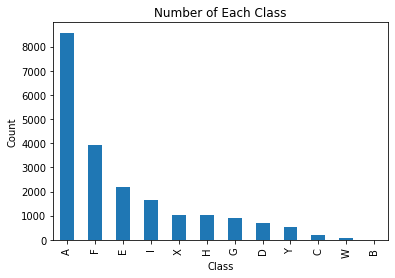

In [21]:
counts.plot.bar(xlabel="Class",ylabel="Count", title="Number of Each Class")

#### Averages of each attribute grouped by class:

In [22]:
class_avg=avila1.groupby(avila1['Class']).mean()

In [23]:
class_avg

,Intercolumnar_distance,Upper_margin,Lower_margin,Exploitation,Row_number,Modular_Ratio,Interlinear_spacing,Weight,Peak_number,Modular_ratio/Interlinear_spacing
Class,,,,,,,,,,
A,-0.017048,0.014770,-0.095196,0.017964,-0.160354,0.226872,0.131313,-0.031798,-0.311457,0.070109
B,-0.128929,12.655362,-0.162690,1.993015,-3.224030,0.822876,0.020099,0.917496,1.262492,0.871939
C,-0.500023,0.527875,0.018410,-0.874858,-0.591279,-0.492359,-0.104856,-0.449579,-0.342688,-0.503979
D,-0.239621,-0.197871,-0.167755,-0.225126,-0.001472,0.128017,0.067551,-0.057262,-0.103279,0.071765
E,-0.259317,-0.054650,0.132236,0.031211,-0.080531,-0.069466,0.196331,0.122781,0.262720,-0.137244
F,0.083733,0.030962,0.043411,-0.225101,0.054711,-0.118739,0.123355,-0.062328,-0.267787,-0.154682
G,0.039337,0.483003,0.188346,-0.201127,0.117192,-0.152099,0.300144,-0.055112,0.148608,-0.235424
H,0.215249,0.120392,0.289671,-0.446953,0.194878,-0.557999,0.192793,-0.093712,0.186049,-0.577360
I,0.649951,-0.295856,-0.089999,-0.133659,0.690980,-0.764923,-1.128631,-0.201491,0.717026,0.024624


#### Pairplot of provided test dataset:

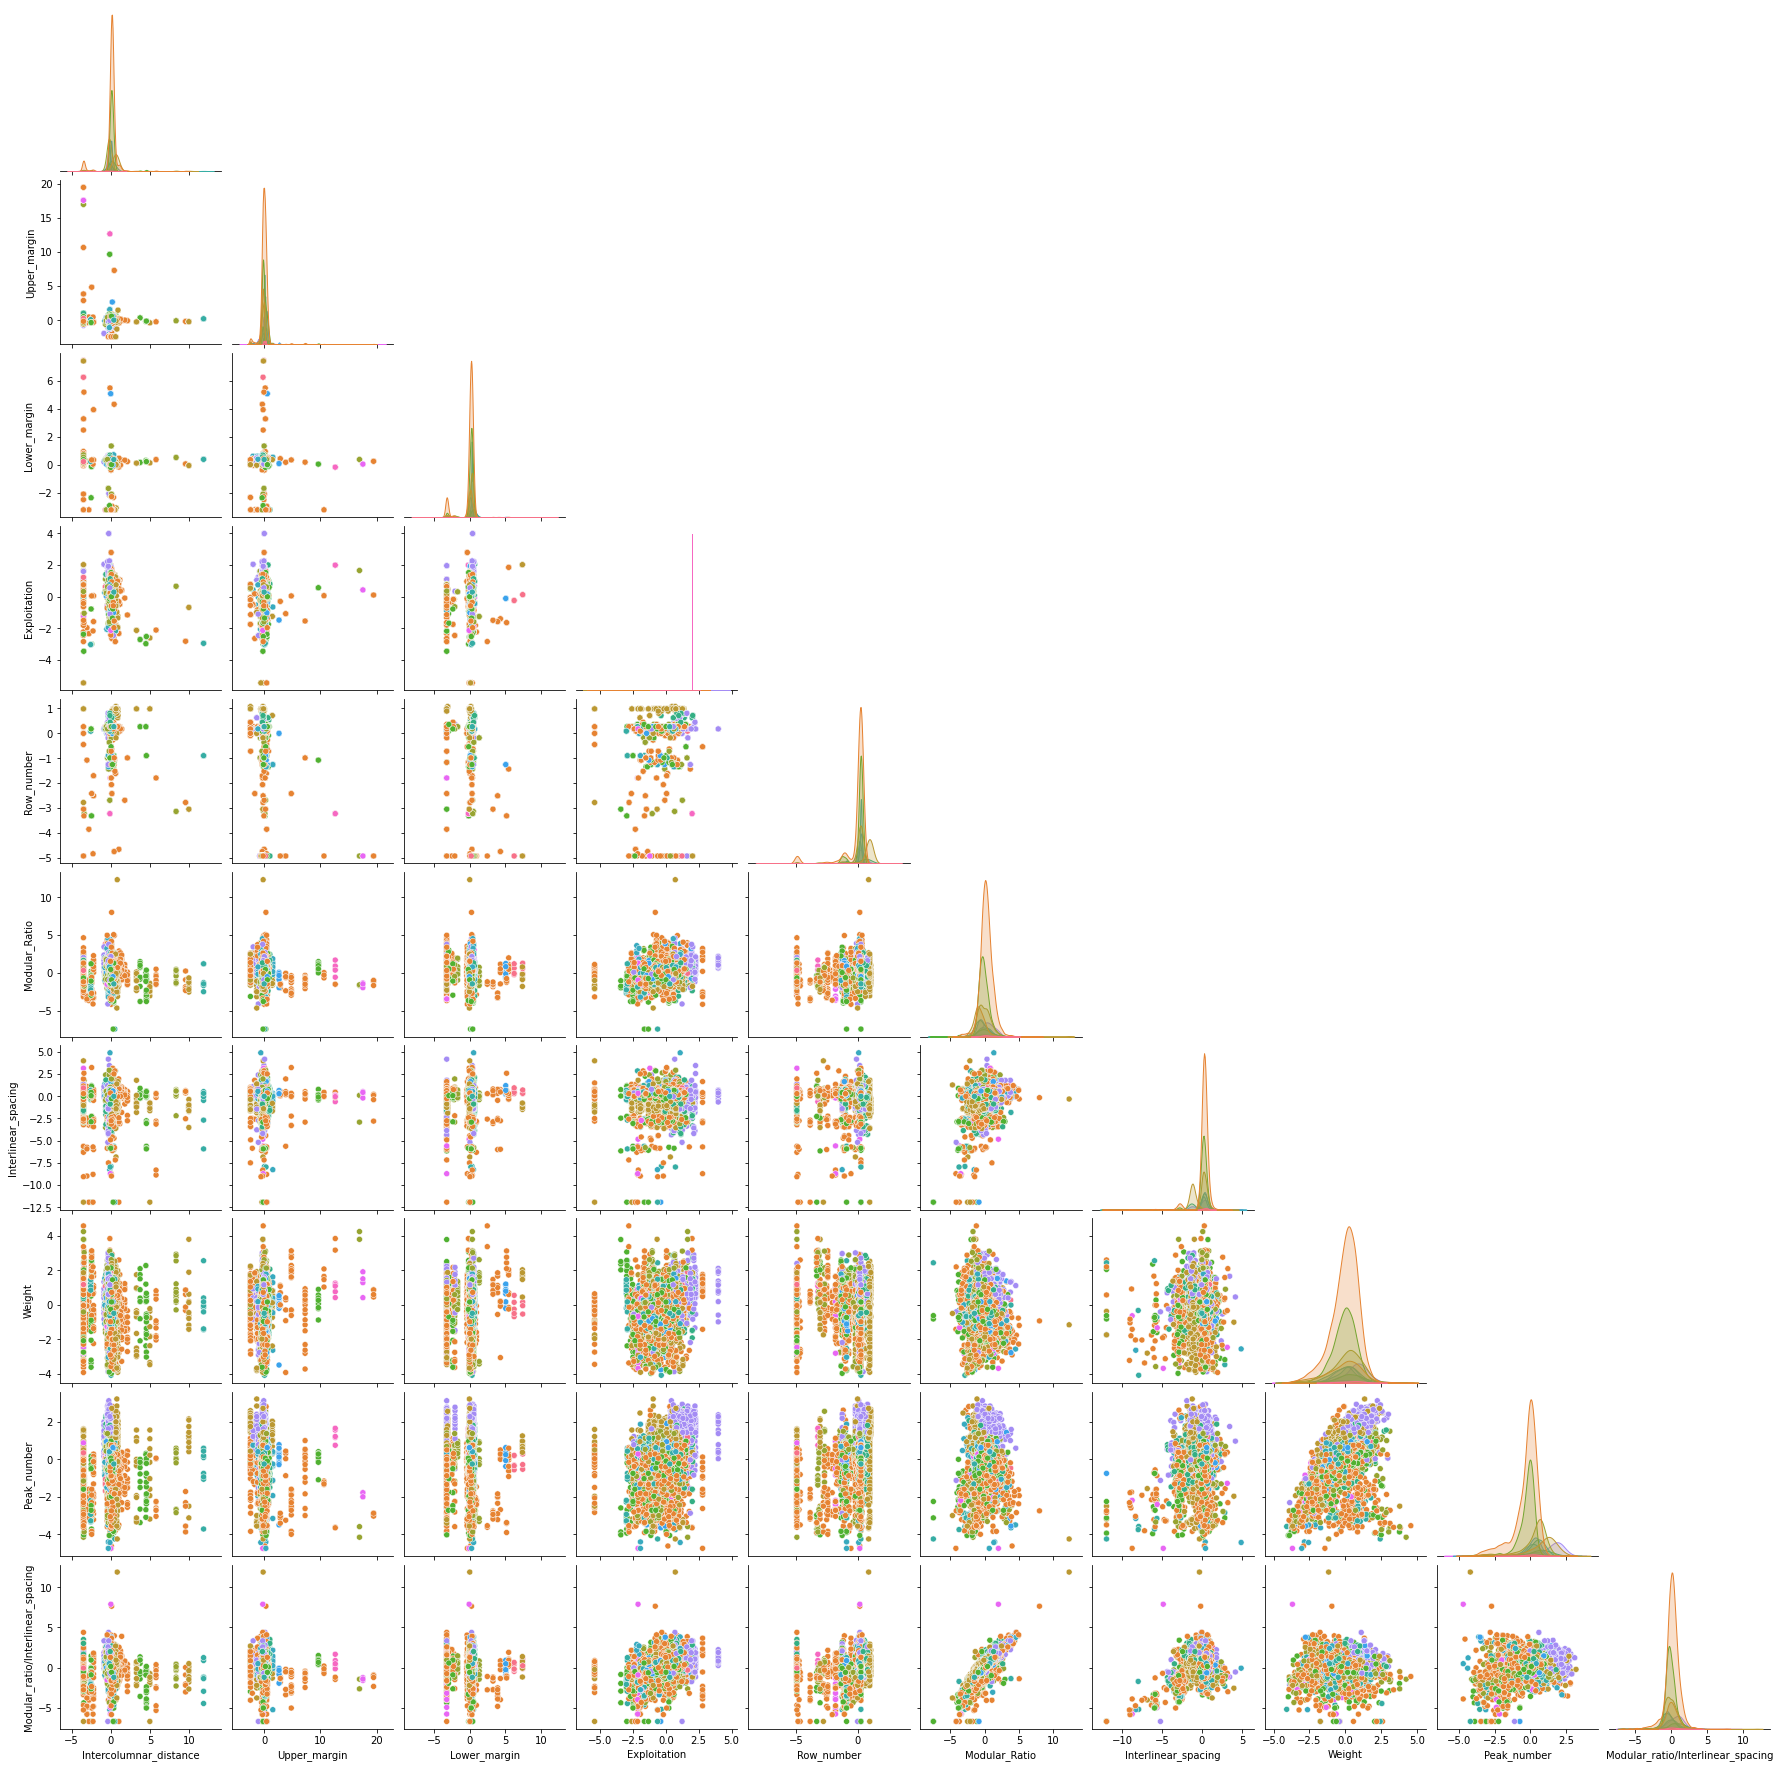

In [24]:
pairplot = sns.pairplot(test, diag_kind='kde', corner=True, hue='Class');
pairplot._legend.remove()

#### Class B data:

In [25]:
classB = avila1.query('Class=="B"')

In [26]:
classB

,Intercolumnar_distance,Upper_margin,Lower_margin,Exploitation,Row_number,Modular_Ratio,Interlinear_spacing,Weight,Peak_number,Modular_ratio/Interlinear_spacing,Class
389,-0.128929,12.655362,-0.16269,1.993015,-3.22403,0.480988,0.484429,1.258390,1.560794,0.282296,B
1745,-0.128929,12.655362,-0.16269,1.993015,-3.22403,-0.584816,-0.610333,0.763432,1.165829,-0.158452,B
6945,-0.128929,12.655362,-0.16269,1.993015,-3.22403,0.896237,0.144676,1.174825,1.217798,0.880375,B
7160,-0.128929,12.655362,-0.16269,1.993015,-3.22403,1.685209,0.069175,0.419760,0.750076,1.660318,B
7892,-0.128929,12.655362,-0.16269,1.993015,-3.22403,0.356414,-0.044076,1.086563,1.654339,0.475828,B
708,-0.128929,12.655362,-0.16269,1.993015,-3.22403,1.269960,-0.119577,0.807040,1.186617,1.456297,B
4639,-0.128929,12.655362,-0.16269,1.993015,-3.22403,0.647088,0.220177,1.470347,1.903791,0.584096,B
7119,-0.128929,12.655362,-0.16269,1.993015,-3.22403,0.647088,-0.044076,0.994767,1.404887,0.745092,B
7740,-0.128929,12.655362,-0.16269,1.993015,-3.22403,1.934358,0.069175,0.121210,0.531806,1.847317,B
9457,-0.128929,12.655362,-0.16269,1.993015,-3.22403,0.896237,0.031425,1.078622,1.248980,0.946220,B


*We found that all the data for the first 5 columns are exactly the same number in the class B data*

<AxesSubplot:>

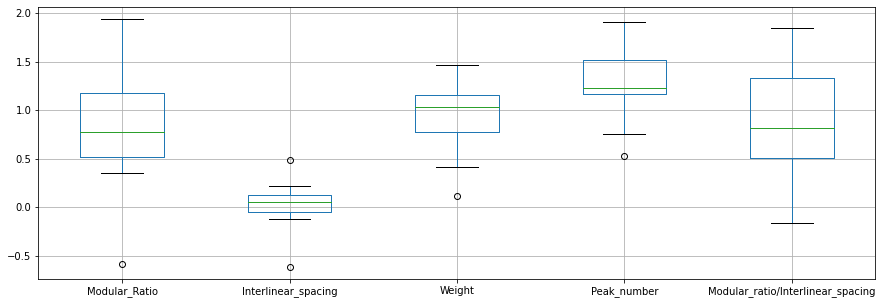

In [27]:
classB.boxplot(column=["Modular_Ratio","Interlinear_spacing","Weight","Peak_number","Modular_ratio/Interlinear_spacing"],figsize=(15,5))

#### Class D data:

In [28]:
classD = avila1.query('Class=="D"')

In [29]:
classD

,Intercolumnar_distance,Upper_margin,Lower_margin,Exploitation,Row_number,Modular_Ratio,Interlinear_spacing,Weight,Peak_number,Modular_ratio/Interlinear_spacing,Class
15,-0.511588,-0.620989,0.491688,-2.053711,-0.006417,1.020811,-0.270579,0.088902,-0.123005,1.252758,D
35,-0.277055,0.030659,0.441898,0.131866,0.172340,-1.055431,-0.044076,0.111541,0.531806,-0.821978,D
54,-0.054866,-0.220579,0.466793,-0.216970,0.172340,1.020811,0.522180,0.033336,0.032902,0.726153,D
99,-0.190648,-1.092060,0.402778,0.749425,0.172340,0.564038,0.748682,0.270669,0.282354,0.215944,D
128,-0.227680,-0.997846,0.356544,-0.026932,0.261718,2.100457,0.295677,-1.325413,-1.120812,1.843520,D
...,...,...,...,...,...,...,...,...,...,...,...
10305,-0.326430,0.321153,0.285416,-1.944952,-0.900198,-2.716425,0.597681,-0.358681,0.874802,-2.568887,D
10342,-0.314087,-0.063555,0.420560,0.003921,0.172340,-0.806282,0.031425,-0.678705,-0.840179,-0.613316,D
10355,-0.511588,-0.620989,0.491688,-2.053711,-0.006417,1.311485,-3.026359,-1.864288,-3.490604,1.399385,D
10365,-0.141273,-1.201976,0.612605,-0.518872,0.172340,0.190314,0.220177,-0.062984,-0.123005,0.146097,D


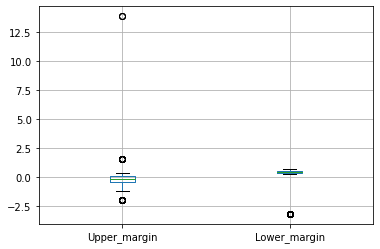

In [30]:
boxplot1 = classD.boxplot(column=["Upper_margin","Lower_margin"])

<AxesSubplot:>

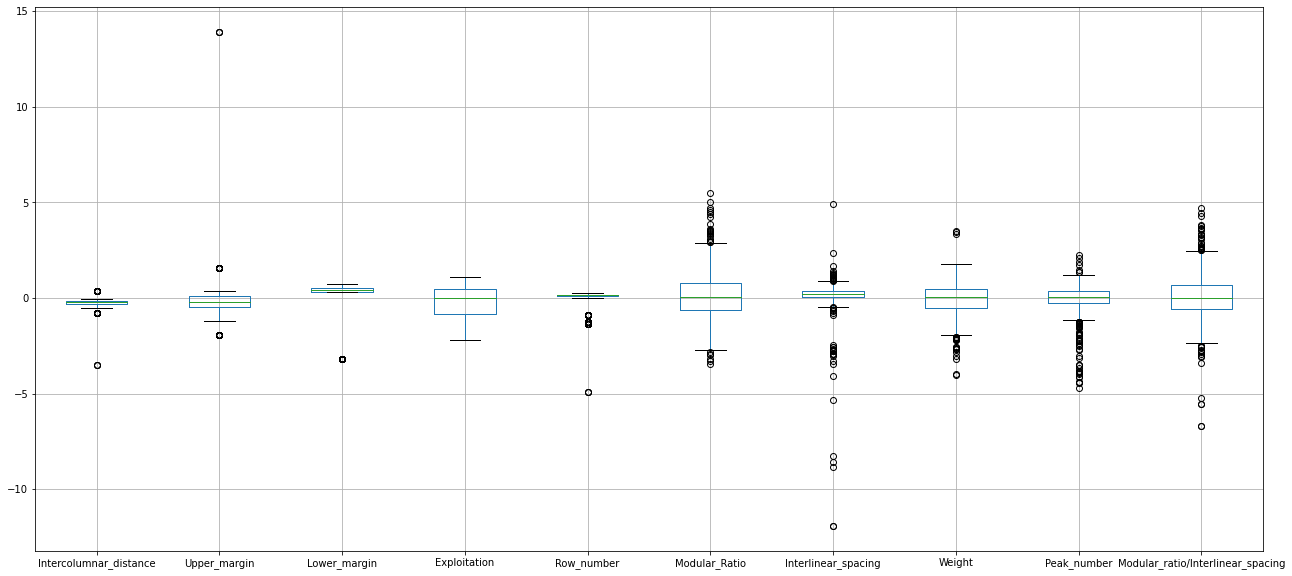

In [31]:
classD.boxplot(figsize=(22,10))

#### Saving merged dataset to csv file:

In [32]:
avila1.to_csv('avilatrain+test.csv', index=False)

In [33]:
pd.read_csv('avilatrain+test.csv')

,Intercolumnar_distance,Upper_margin,Lower_margin,Exploitation,Row_number,Modular_Ratio,Interlinear_spacing,Weight,Peak_number,Modular_ratio/Interlinear_spacing,Class
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A
...,...,...,...,...,...,...,...,...,...,...,...
20861,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141,F
20862,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134,F
20863,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142,A
20864,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969,E


## Prepping Data for Machine Learning Models:

#### Prepping to predict if data belongs to class A or class F:

In [34]:
avilaml = avila1.query("Class=='A' | Class=='F'")

In [35]:
from sklearn.model_selection import train_test_split 

#### Converting A and F to numerical values:

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le_class = LabelEncoder()

In [38]:
avilaml['Class_n'] = le_class.fit_transform(avilaml['Class'])

/var/folders/43/bdr7jz1d737fv912dn77d7400000gn/T/ipykernel_30486/2902850870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avilaml['Class_n'] = le_class.fit_transform(avilaml['Class'])


In [39]:
avilaml

,Intercolumnar_distance,Upper_margin,Lower_margin,Exploitation,Row_number,Modular_Ratio,Interlinear_spacing,Weight,Peak_number,Modular_ratio/Interlinear_spacing,Class,Class_n
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A,0
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A,0
5,0.068573,-0.181323,-3.210528,-0.294311,-1.168333,0.356414,-0.006326,-0.219550,0.126447,0.448186,F,1
7,0.031541,-0.118513,0.374326,-0.066706,0.261718,0.605563,0.559930,-0.258129,0.095265,0.344766,A,0
8,-0.091897,-0.118513,0.189393,1.280303,0.261718,0.314889,0.069175,1.277183,0.531806,0.359002,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10421,0.241386,0.234790,0.121822,1.037988,0.261718,0.647088,0.182426,0.684936,0.219991,0.628422,A,0
10424,0.216699,0.321153,0.128935,0.491087,0.261718,0.439463,0.069175,0.252846,0.188810,0.482857,A,0
10425,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141,F,1
10426,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134,F,1


*A=0 and F=1*

### *We use different variables to make different splits of data in order to easily evaluate the differences later*

#### 70/15/15 Split:

In [40]:
X = avilaml.iloc[:,0:10]
y = avilaml.iloc[:,-1]

In [41]:
X_train, X_small, y_train, y_small = train_test_split(X,y, 
                                                      test_size=.30,
                                                     random_state=32)

In [42]:
X_test, X_validate, y_test, y_validate = train_test_split(X_small, y_small,
                                                         test_size=.5,
                                                         random_state=32)

#### 80/10/10 Split:

In [43]:
A = avilaml.iloc[:,0:10]
b = avilaml.iloc[:,-1]

In [44]:
A_train, A_small, b_train, b_small = train_test_split(A,b, 
                                                      test_size=.20,
                                                     random_state=32)

In [45]:
A_test, A_validate, b_test, b_validate = train_test_split(A_small, b_small,
                                                         test_size=.5,
                                                         random_state=32)

### K-Nearest Neighbor

In [46]:
from sklearn.neighbors import KNeighborsClassifier

### First: (70/15/15) split test

#### Create and fit model:

In [47]:
neigh=KNeighborsClassifier(n_neighbors=2)

In [48]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

#### Score of fitted data:

In [49]:
neigh.score(X_train, y_train)

0.9242995997712978

#### Score on validation data:

In [50]:
neigh.score(X_validate,y_validate)

0.8197333333333333

#### Prediction:

In [51]:
y_pred = neigh.predict(X_test)

#### Prediction score

In [52]:
neigh.score(X_test,y_test)

0.8431163287086446

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [54]:
accuracy_score(y_pred, y_test)*100

84.31163287086446

#### Confusion Matrix:

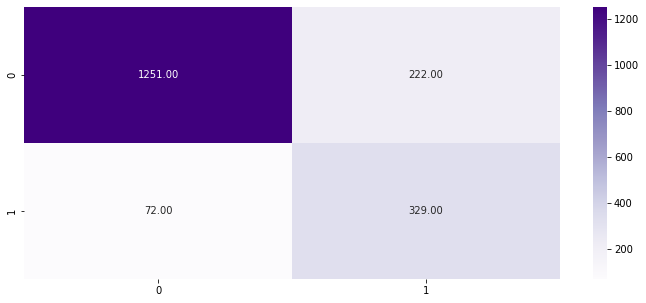

In [55]:
cm = confusion_matrix(y_pred, y_test)
fig = plt.figure(figsize=(12,5))
heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='Purples')
plt.ylabel=('True label')
plt.xlabel=('Predicted label')

#### Classification report:

In [56]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.85      0.89      1473
           1       0.60      0.82      0.69       401

    accuracy                           0.84      1874
   macro avg       0.77      0.83      0.79      1874
weighted avg       0.87      0.84      0.85      1874



### Next - (80/10/10) split test:

#### Training model:

In [57]:
neigh.fit(A_train, b_train)

KNeighborsClassifier(n_neighbors=2)

#### Score on fitted data:

In [58]:
neigh.score(A_train, b_train)

0.9254627313656828

#### Validation score:

In [59]:
neigh.score(A_validate, b_validate)

0.8216

#### Prediction using test values:

In [60]:
b_pred = neigh.predict(A_test)

#### Score on prediction:

In [61]:
neigh.score(A_test,b_test)

0.8478783026421137

In [62]:
accuracy_score(b_pred, b_test)*100

84.78783026421138

#### Confusion matrix:

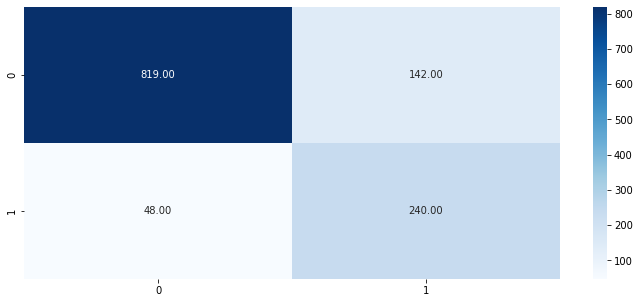

In [63]:
cm = confusion_matrix(b_pred, b_test)
fig = plt.figure(figsize=(12,5))
heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')

#### Classification report:

In [64]:
print(classification_report(b_pred,b_test))

              precision    recall  f1-score   support

           0       0.94      0.85      0.90       961
           1       0.63      0.83      0.72       288

    accuracy                           0.85      1249
   macro avg       0.79      0.84      0.81      1249
weighted avg       0.87      0.85      0.85      1249



### KNN with Full dataset:

#### Assigning numerical values to classes:

In [65]:
fullle_class = LabelEncoder()

In [66]:
avila1['Class_n'] = fullle_class.fit_transform(avila1['Class'])

/var/folders/43/bdr7jz1d737fv912dn77d7400000gn/T/ipykernel_30486/1887372153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avila1['Class_n'] = fullle_class.fit_transform(avila1['Class'])


In [67]:
avila1

,Intercolumnar_distance,Upper_margin,Lower_margin,Exploitation,Row_number,Modular_Ratio,Interlinear_spacing,Weight,Peak_number,Modular_ratio/Interlinear_spacing,Class,Class_n
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W,9
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A,0
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I,8
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E,4
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10425,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141,F,5
10426,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134,F,5
10427,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142,A,0
10428,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969,E,4


#### Splitting avila1 (80,10,10):

In [68]:
C = avila1.iloc[:,0:10]
d = avila1.iloc[:,-1]

In [69]:
C_train, C_small, d_train, d_small = train_test_split(C,d, 
                                                      test_size=.20,
                                                     random_state=32)

In [70]:
C_test, C_validate, d_test, d_validate = train_test_split(C_small, d_small,
                                                         test_size=.5,
                                                         random_state=32)

#### Setting K number to number of classes:

In [71]:
neighfull=KNeighborsClassifier(n_neighbors=3)

#### Fitting data to training data:

In [72]:
neighfull.fit(C_train, d_train)

KNeighborsClassifier(n_neighbors=3)

#### Score of fitted data:

In [73]:
neighfull.score(C_train, d_train)

0.892104001917086

#### Score of validation data:

In [74]:
neighfull.score(C_validate, d_validate)

0.7728797316722569

#### Prediction:

In [75]:
d_pred = neighfull.predict(C_test)

#### Prediction score:

In [76]:
neighfull.score(C_test,d_test)

0.794920939147101

In [77]:
accuracy_score(d_pred, d_test)*100

79.49209391471011

#### Confusion matrix:

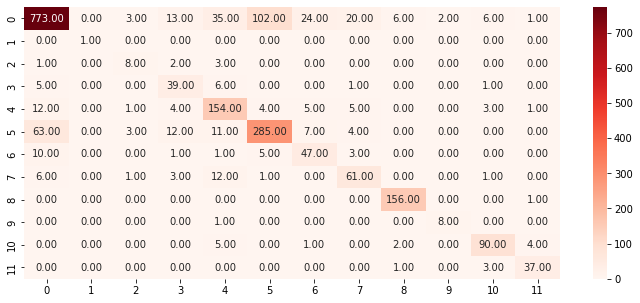

In [78]:
cm = confusion_matrix(d_pred, d_test)
fig = plt.figure(figsize=(12,5))
heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='Reds')

#### Classification report:

In [79]:
print(classification_report(d_pred,d_test))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       985
           1       1.00      1.00      1.00         1
           2       0.50      0.57      0.53        14
           3       0.53      0.75      0.62        52
           4       0.68      0.81      0.74       189
           5       0.72      0.74      0.73       385
           6       0.56      0.70      0.62        67
           7       0.65      0.72      0.68        85
           8       0.95      0.99      0.97       157
           9       0.80      0.89      0.84         9
          10       0.87      0.88      0.87       102
          11       0.84      0.90      0.87        41

    accuracy                           0.79      2087
   macro avg       0.75      0.81      0.78      2087
weighted avg       0.81      0.79      0.80      2087



## Decision Tree Model

In [80]:
from sklearn import tree
from sklearn.tree import export_text
import graphviz

### Decision tree (70/15/15):

#### Fit data to model:

In [81]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=20)
clf = clf.fit(X_train, y_train)

#### Score of fitted data:

In [82]:
clf.score(X_train, y_train)

0.9320754716981132

#### Score of validation data:

In [83]:
clf.score(X_validate, y_validate)

0.9189333333333334

#### Prediction:

In [84]:
y_pred = clf.predict(X_test)

#### Score of prediction:

In [85]:
clf.score(X_test, y_test)

0.9167556029882604

#### Confusion matrix:

In [86]:
def plot_cm(y_pred, y_test):
    cm = confusion_matrix(y_pred, y_test)
    fig = plt.figure(figsize=(12,5))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')

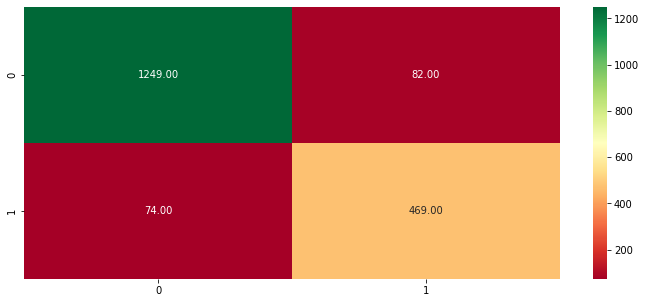

In [87]:
plot_cm(y_pred, y_test)

#### Classification report:

In [88]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1331
           1       0.85      0.86      0.86       543

    accuracy                           0.92      1874
   macro avg       0.90      0.90      0.90      1874
weighted avg       0.92      0.92      0.92      1874



### Decision Tree (80/10/10):

#### Fit data to model:

In [89]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=20)
clf = clf.fit(A_train, b_train)

#### Score of fitted data:

In [90]:
clf.score(A_train, b_train)

0.935967983991996

#### Score of validation data:

In [91]:
clf.score(A_validate,b_validate)

0.9304

#### Prediction:

In [92]:
b_pred = clf.predict(A_test)

#### Score of prediction:

In [93]:
clf.score(A_test, b_test)

0.9191353082465973

#### Confusion Matrix:

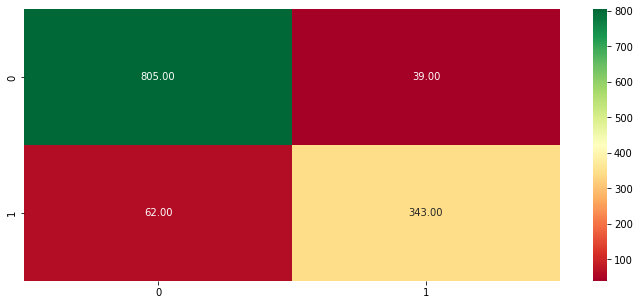

In [94]:
plot_cm(b_pred, b_test)

#### Classification Report:

In [95]:
print(classification_report(b_pred,b_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       844
           1       0.90      0.85      0.87       405

    accuracy                           0.92      1249
   macro avg       0.91      0.90      0.91      1249
weighted avg       0.92      0.92      0.92      1249



#### Full Dataset Decision Tree (80,10,10):

In [96]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=20)
clf = clf.fit(C_train, d_train)

#### Score of fitted data:

In [97]:
clf.score(C_train, d_train)

0.9215791996165827

#### Score of validation data:

In [98]:
clf.score(C_validate, d_validate)

0.8974604695735505

#### Prediction:

In [99]:
d_pred = clf.predict(C_test)

#### Score of prediction:

In [100]:
clf.score(C_test, d_test)

0.9103977000479156

#### Confusion Matrix:

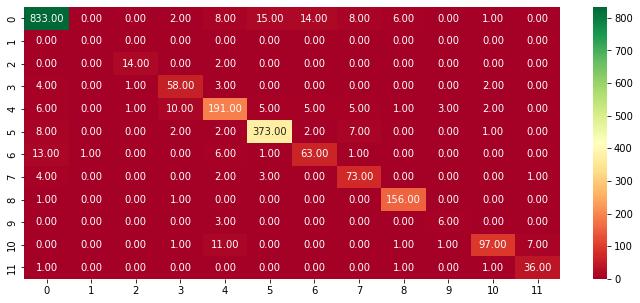

In [101]:
plot_cm(d_pred, d_test)

#### Classification Report:

In [102]:
print(classification_report(d_pred,d_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       887
           1       0.00      0.00      0.00         0
           2       0.88      0.88      0.88        16
           3       0.78      0.85      0.82        68
           4       0.84      0.83      0.84       229
           5       0.94      0.94      0.94       395
           6       0.75      0.74      0.75        85
           7       0.78      0.88      0.82        83
           8       0.95      0.99      0.97       158
           9       0.60      0.67      0.63         9
          10       0.93      0.82      0.87       118
          11       0.82      0.92      0.87        39

    accuracy                           0.91      2087
   macro avg       0.77      0.79      0.78      2087
weighted avg       0.91      0.91      0.91      2087



/Users/hunterwaldridge/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hunterwaldridge/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hunterwaldridge/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
